In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('linkedin-company-information.csv')
df

,id,name,country_code,locations,followers,employees_in_linkedin,about,specialties,company_size,organization_type,...,url,updates,slogan,affiliated,funding,investors,formatted_locations,stock_info,get_directions_url,description
0,netzsch-analyzing-testing,NETZSCH Analyzing & Testing,DE,"[""Wittelsbacher Str. 42 Selb, Bayern 95100, DE""]",7947,197,The Analyzing & Testing business unit of the N...,"Thermal Analysis, Thermophysical Properties, A...","1,001-5,000 employees",Privately Held,...,https://www.linkedin.com/company/netzsch-analy...,"[{""external_link"":""https://www.linkedin.com/re...",PROVEN EXCELLENCE,"[{""Links"":""https://de.linkedin.com/company/net...",NaN,NaN,"[""Wittelsbacher Str. 42, Selb, Bayern 95100, DE""]",NaN,"[{""directions_url"":""https://www.bing.com/maps?...","NETZSCH Analyzing &amp; Testing | 7,947 follow..."
1,promip,Promip,BR,"[""Rua Tiradentes 1200 Splendor Office Piracica...",15113,68,A PROMIP foi fundada em 2006 com a missão de c...,"Fabricação de Produtos Biológicos, Comercializ...",51-200 employees,Privately Held,...,https://www.linkedin.com/company/promip,"[{""likes_count"":14,""text"":""❓Você conhece o Mip...",Buscamos na natureza soluções que viabilizem u...,NaN,"{""last_round_date"":""2017-07-13T00:00:00.000Z"",...",NaN,"[""Rua Tiradentes 1200, Splendor Office, Piraci...",NaN,"[{""directions_url"":""https://www.bing.com/maps?...","Promip | 15,113 followers on LinkedIn. Buscamo..."
2,lemfi,LemFi,US,"[""Oakland, CA 94601, US""]",9594,179,International Payments for everyone. Send mone...,NaN,11-50 employees,Privately Held,...,https://www.linkedin.com/company/lemfi,"[{""comments_count"":22,""external_link"":""https:/...",International Payments for everyone. Send mone...,NaN,"{""last_round_date"":""2023-09-24T00:00:00.000Z"",...","[""Left Lane Capital"",""+ 4 Other investors""]","[""Oakland, CA 94601, US""]",NaN,"[{""directions_url"":""https://www.bing.com/maps?...","LemFi | 9,594 followers on LinkedIn. Internati..."
3,addiszeybe,Addis Zeybe - አዲስ ዘይቤ,ET,"[""Sierra Leone Street Hussien Building, 3rd Fl...",11864,16,Addis Zeybe contributes to creating a new medi...,"Urban, Professionalism, and Ethiopia",11-50 employees,Privately Held,...,https://www.linkedin.com/company/addiszeybe,"[{""external_link"":""https://www.linkedin.com/re...",Discover #Ethiopia's urban news & stories with...,"[{""Links"":""https://www.linkedin.com/showcase/s...",NaN,NaN,"[""Sierra Leone Street, Hussien Building, 3rd F...",NaN,"[{""directions_url"":""https://www.bing.com/maps?...","Addis Zeybe - አዲስ ዘይቤ | 11,864 followers on Li..."
4,stayble-therapeutics,Stayble Therapeutics,SE,"[""Medicinaregatan 8A Gothenburg, 41390, SE""]",871,9,Stayble is a clinical stage pharmaceutical com...,Pharmaceutical development and Chronic low bac...,2-10 employees,Partnership,...,https://www.linkedin.com/company/stayble-thera...,"[{""comments_count"":1,""images"":[""https://media....",Stayble is a clinical stage pharmaceutical com...,NaN,"{""last_round_date"":""2023-05-12T00:00:00.000Z"",...",NaN,"[""Medicinaregatan 8A, Gothenburg, 41390, SE""]",NaN,"[{""directions_url"":""https://www.bing.com/maps?...",Stayble Therapeutics | 871 followers on Linked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,stoutagri,StoutAgri Livestock Equipment Manufacturer,CN,"[""No.620 Chuncheng Road, Chengyang District Qi...",43,4,Stout Agri Ltd. is a professional livestock eq...,"Livestock equipment, Poultry equipment, Pig eq...",11-50 employees,Privately Held,...,https://www.linkedin.com/company/stoutagri,[],Manufacturer of livestock equipment in China. ...,[],NaN,NaN,"[""No.620 Chuncheng Road, Chengyang District, Q...",NaN,"[{""directions_url"":""https://www.bing.com/maps?...",StoutAgri Livestock Equipment Manufacturer | 4...
996,primocollect-receivables-center,PrimoCollect Ukraine,"UA,RU","[""Surikova 3a Kyiv, 03067, UA"",""28 building, 1...",484,42,Since 2006 PrimoCollect Group is one of the mo...,"Debt purchase (DB

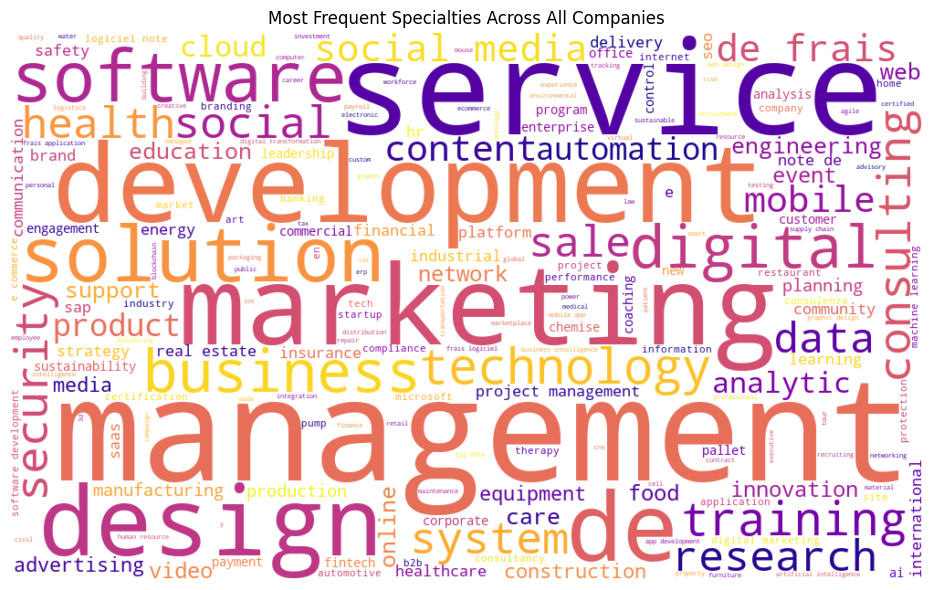

In [3]:
#Word Cloud – Most frequent specialties across all companies.
# Combine all specialties into a single string
specialties_text = df['specialties'].dropna().astype(str).str.lower().str.cat(sep=', ')

# Optional: Split and rejoin to handle comma-separated specialties properly
specialties_list = [s.strip() for s in specialties_text.split(',')]
specialties_cleaned = ' '.join(specialties_list)

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='plasma').generate(specialties_cleaned)

# Plot it
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Specialties Across All Companies')
plt.tight_layout()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4840\2263384529.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=specialties, palette='magma')


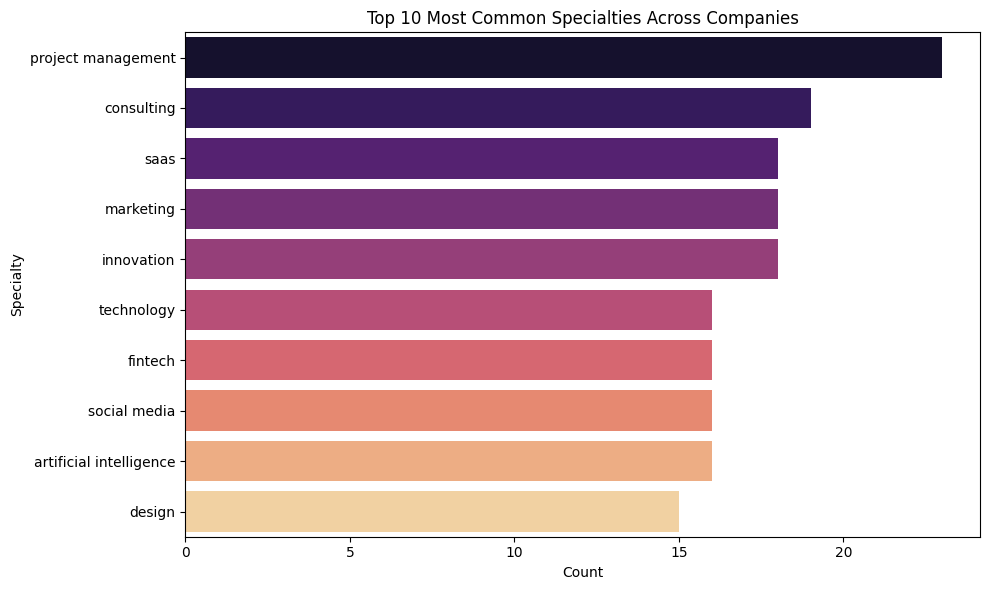

In [4]:
from collections import Counter



# Drop missing values and process the 'specialties' column
specialties_series = df['specialties'].dropna().astype(str).str.lower()

# Split specialties and flatten the list
specialties_split = specialties_series.str.split(',')
specialties_flat = [s.strip() for sublist in specialties_split for s in sublist]

# Count the occurrences of each specialty
specialty_counts = Counter(specialties_flat)
top_10_specialties = dict(specialty_counts.most_common(10))

# Prepare data for plotting
specialties = list(top_10_specialties.keys())
counts = list(top_10_specialties.values())

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=specialties, palette='magma')
plt.title('Top 10 Most Common Specialties Across Companies')
plt.xlabel('Count')
plt.ylabel('Specialty')
plt.tight_layout()
plt.show()

In [5]:

# Drop rows with missing organization_type or specialties
df = df.dropna(subset=['organization_type', 'specialties'])

# Preprocess specialties: lowercased and split by comma
rows = []
for _, row in df.iterrows():
    org_type = str(row['organization_type']).strip()
    specialties = str(row['specialties']).lower().split(',')
    for spec in specialties:
        spec_cleaned = spec.strip()
        if spec_cleaned:
            rows.append({'organization_type': org_type, 'specialty': spec_cleaned})

# Convert to DataFrame
sunburst_df = pd.DataFrame(rows)

# Count the combinations
grouped = sunburst_df.groupby(['organization_type', 'specialty']).size().reset_index(name='count')

# Create the sunburst chart
fig = px.sunburst(
    grouped,
    path=['organization_type', 'specialty'],
    values='count',
    title='Sunburst Chart: Specialties within Organization Types',
    color='organization_type',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(insidetextorientation='radial')
fig.show()

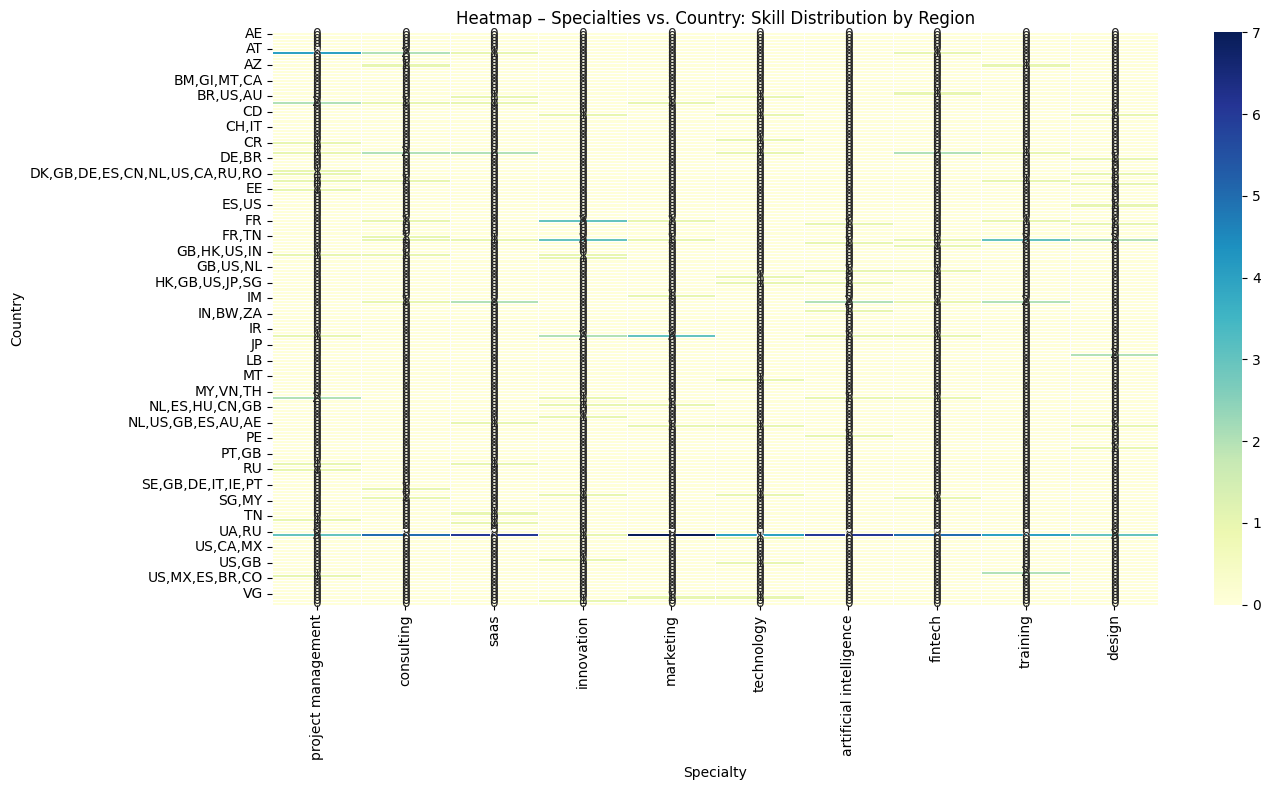

In [6]:
df = df.dropna(subset=['specialties', 'country_code'])

# Normalize text
df['country_code'] = df['country_code'].astype(str).str.strip().str.upper()

# Create rows for each specialty-country pair
rows = []
for _, row in df.iterrows():
    country = row['country_code']
    specialties = str(row['specialties']).lower().split(',')
    for spec in specialties:
        spec_cleaned = spec.strip()
        if spec_cleaned:
            rows.append({'country': country, 'specialty': spec_cleaned})

# Convert to DataFrame
specialty_df = pd.DataFrame(rows)

# Create pivot table: countries as rows, specialties as columns
pivot = specialty_df.pivot_table(index='country', columns='specialty', aggfunc='size', fill_value=0)

# Optional: Keep only top N specialties for readability
top_specialties = specialty_df['specialty'].value_counts().head(10).index
pivot = pivot[top_specialties]

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='d')
plt.title('Heatmap – Specialties vs. Country: Skill Distribution by Region')
plt.xlabel('Specialty')
plt.ylabel('Country')
plt.tight_layout()
plt.show()